In [9]:
import pickle
# Open Dictionary
with open("ddict.pickle", "rb") as f : 
    ddict = pickle.load(f)

# Dictplot 

가지고 있는 Topic Vector 를 Plot 하고 구간을 나눈다. 

#Order Numpy 와 Temnp
두 자료는 모두 (365, 15) = (날짜, topic의 수) 의 int형 numpy. 

각 row는 20180401 부터 20190331까지 순서대로 배열되어있다. 

temnp_1 
1. 먼저, topic vector 가 0.07이상인 것들만 남긴다. 0.07이하의 것들은 topic의 기능이 없다고 봄.

2. 그리고 topic vector를 더한다. 
이 부분이 09월 03일 의논했던 바와 다른데, 이걸 빈도로 치환하여 더하기로 했으나 
그렇게 하면 topic vector의 가중치가 너무 무시된다고 생각하여 그냥 더했다. 

ex)
원본 ddict 
20180401 0.08
20180401 0.05
20180401 0.8 

결과 :
temnp_1 
0.05 삭제  

2. ordernumpy는 등급이다. 
각 1~10 으로 되어있으며 등급이 낮을수록 상위 10*n 퍼센트라는 뜻. 

예를 들어, 
20180401 155
20180402 1 

이 때 155는 상위 10%안에, 1은 상위 90%밖이라면, 
Ordernumpy는 

20180401 1 
20180402 10 

이렇게 저장된다.

In [10]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt 

In [12]:
dates = ddict.keys()

In [13]:
temp = 0
for i in ddict[20180401]:
    temp+=i[0]
j = len(ddict[20180401])

In [14]:
temp / j

0.00796311681504136

In [15]:
aver_dict = {}
for i in dates :
    temp_np = np.zeros(15)
    for j in ddict[i] :
        temp_np += np.asarray(j)
    temp_np /= len(ddict[i])    
    aver_dict[i] = list(temp_np)    
        

In [16]:
aver_dict[20180401]

[0.00796311681504136,
 0.050173832240070895,
 0.0046499639781425114,
 0.046990417910682196,
 0.055837072472084366,
 0.04184946983724782,
 0.38392770072161436,
 0.0210688935681014,
 0.04621842461558557,
 0.08778994828112356,
 0.02887285690926726,
 0.005005122907150687,
 0.02807324195028415,
 0.0847891144129622,
 0.10679082377689342]

In [17]:
dates = list(dates)

In [18]:
dates.sort()

In [19]:
import seaborn as sns

In [20]:
#get_date time 
import datetime
def get_date(integer) : 
    year = integer // 10**4
    integer = integer % 10**4
    month = integer // 10**2
    day = integer % 10**2
    return datetime.datetime(year, month, day)
    

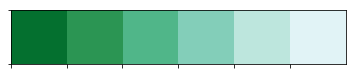

In [21]:
sns.palplot(sns.color_palette("BuGn_r"))

[Text(0.5, 1.0, 'Number of Documents')]

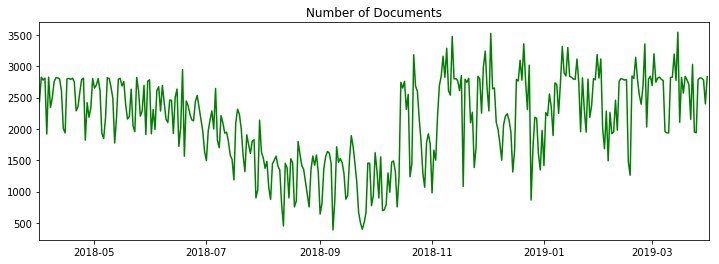

In [22]:
len_list = []
dlist = []
for i in dates : 
    len_list.append(len(ddict[i]))
    dlist.append(get_date(i))

g = sns.lineplot(dlist, len_list, color = "green")
g.figure.set_figwidth(12)
g.set_xlim(get_date(20180401), get_date(20190401))
g.set(title = "Number of Documents")

In [23]:
def plot_topic(topic_num) : 
    j = topic_num - 1
    len_list = []
    dlist = []
    for i in dates : 
        len_list.append(aver_dict[i][j])
        dlist.append(get_date(i))

    k = sns.scatterplot(dlist, len_list)
    k.figure.set_figwidth(12)
    k.set_xlim(get_date(20180401), get_date(20190401))
    k.set(title = "Number of Topic {0} / Average per date".format(topic_num))


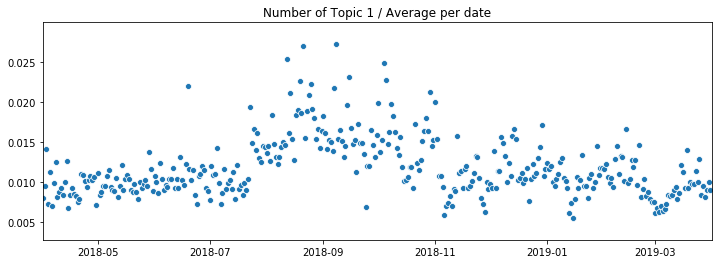

In [24]:
plot_topic(1)

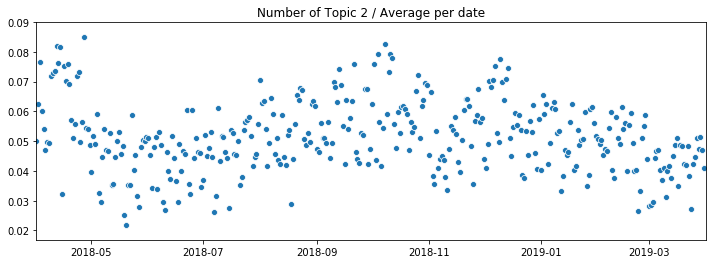

In [25]:
plot_topic(2)

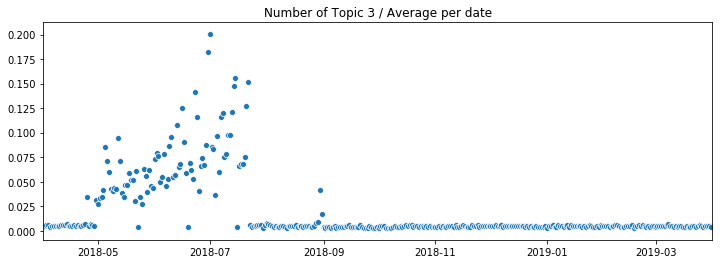

In [26]:
plot_topic(3)

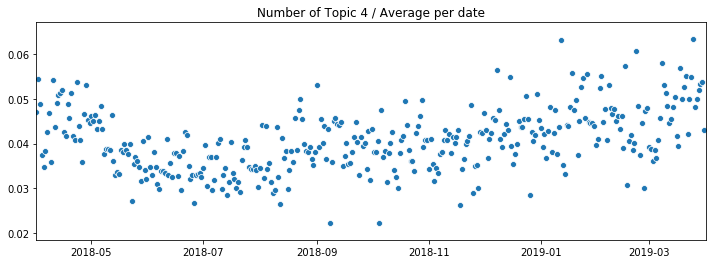

In [27]:
plot_topic(4)

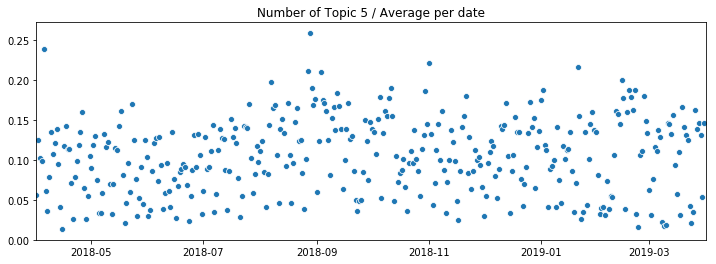

In [28]:
plot_topic(5)

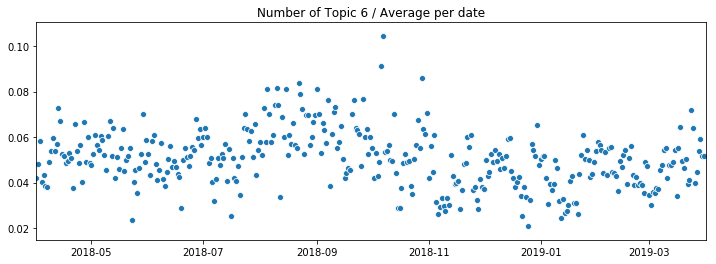

In [29]:
plot_topic(6)

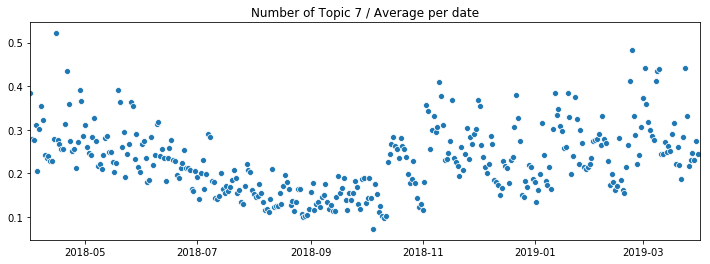

In [30]:
plot_topic(7)

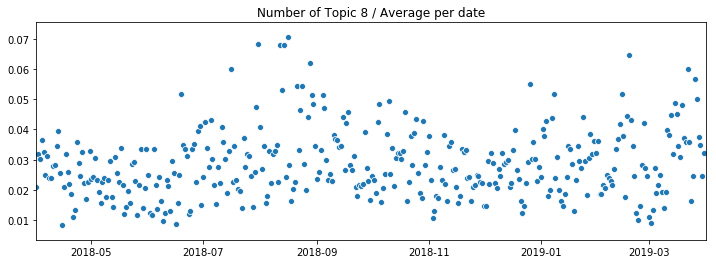

In [31]:
plot_topic(8)

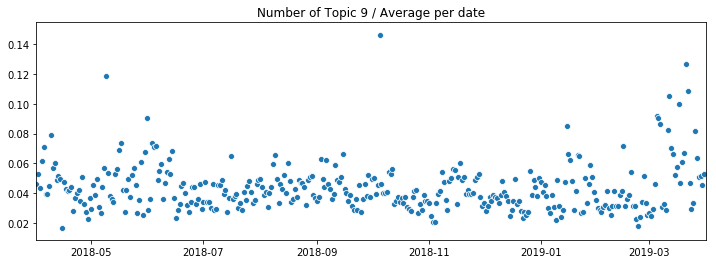

In [32]:
plot_topic(9)

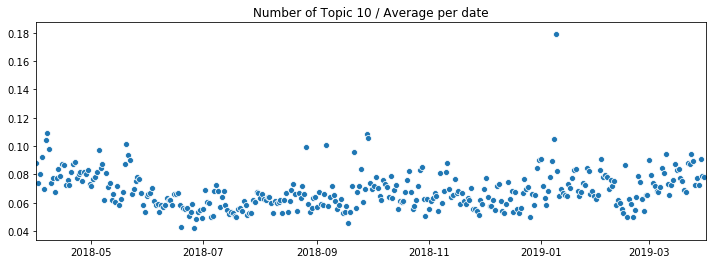

In [33]:
plot_topic(10)

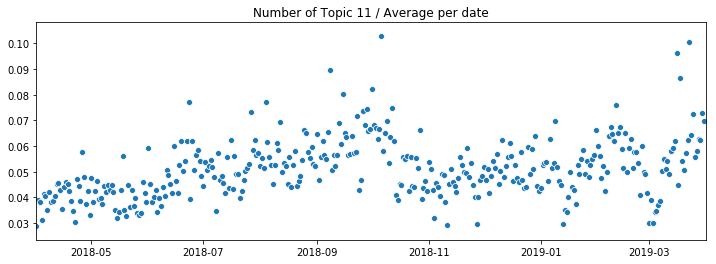

In [34]:
plot_topic(11)

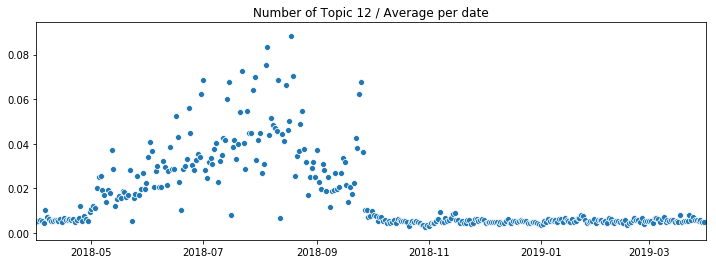

In [35]:
plot_topic(12)

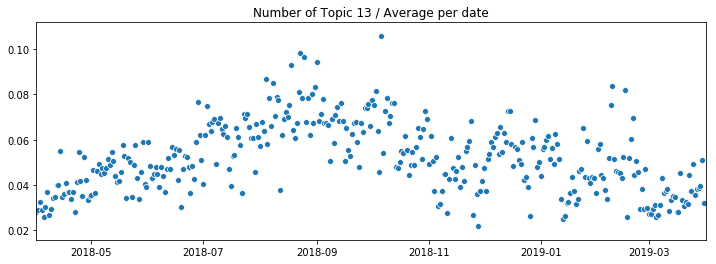

In [36]:
plot_topic(13)

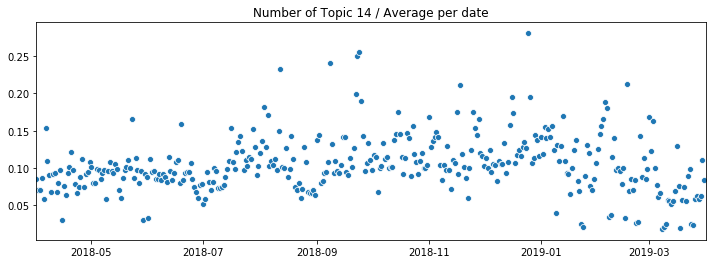

In [37]:
plot_topic(14)

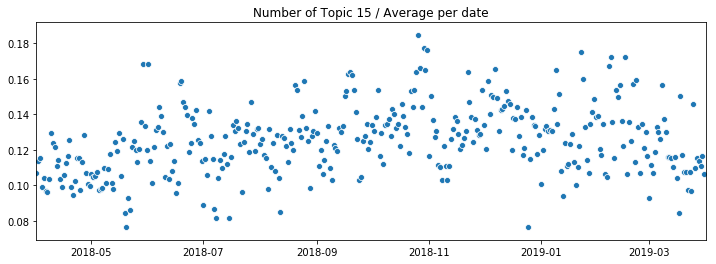

In [38]:
plot_topic(15)

In [39]:
weight_dict = {}
for i in dates :
    legend = np.zeros(15)
    for j in ddict[i]:
        temp = np.asarray(j)
        temp[temp[:] <0.07] = 0
        #print(temp)
        legend += temp
    weight_dict[i] = legend.astype(int) 
    

In [40]:
weight_dict[20180401]

array([  6, 111,   2,  95, 123,  91, 924,  41,  98, 193,  56,   3,  53,
       189, 244])

In [41]:
temnp = np.zeros(15, dtype = int)
for i in dates :
    temnp = np.vstack((temnp, weight_dict[i]))

In [42]:
temnp = np.delete(temnp, (0), axis = 0)

In [43]:
temnp.shape

(365, 15)

In [44]:
temnp[0]

array([  6, 111,   2,  95, 123,  91, 924,  41,  98, 193,  56,   3,  53,
       189, 244])

In [45]:
t10 = np.percentile(temnp, 10, axis = 0)
# 하위 25%
t20 = np.percentile(temnp, 20, axis = 0)
t30 = np.percentile(temnp, 30, axis = 0)
t40 = np.percentile(temnp, 40, axis = 0)
t50 = np.percentile(temnp, 50, axis = 0)
t60 = np.percentile(temnp, 60, axis = 0)
t70 = np.percentile(temnp, 70, axis = 0)
t80 = np.percentile(temnp, 80, axis = 0)
#제일 높다 
t90 = np.percentile(temnp, 90, axis = 0)

In [46]:
tlist = [t90, t80, t70, t60, t50, t40, t30, t20, t10]

In [47]:
print(tlist[0])
print(tlist[8])

[ 19.  151.6 148.2 111.6 378.2 132.  848.6  86.2 142.2 193.  137.   64.6
 130.  327.  362. ]
[  7.   44.    1.   35.   54.4  55.  150.4  17.   33.4  67.4  56.    2.
  53.4 100.  132.6]


In [48]:
ordernumpy = np.zeros(temnp.shape, dtype = int)
for date_row in range(365) :
    for topic_col in range(15) :
        j = 1
        for t in tlist:
            #print(t[topic_col])
            #print(t)
            if t[topic_col] <= temnp[date_row][topic_col] :
                ordernumpy[date_row][topic_col] = j
                break
            j+=1   
ordernumpy[ordernumpy[:] < 1] = 10                 

In [49]:
ordernumpy[:, 1]

array([ 4,  1,  1,  1,  6,  4,  4,  4,  1,  1,  1,  1,  1,  1,  9,  1,  1,
        1,  1,  2,  4,  4,  1,  1,  3,  6,  1,  4,  4,  3,  6,  3,  3,  2,
        9,  9,  7,  2,  4,  4,  4,  9,  8,  4,  3,  3,  4,  5,  9, 10,  7,
        8,  5,  5,  4,  9,  9,  4,  7,  3,  3,  6,  6,  9,  4,  3,  8,  3,
        4,  9,  9,  5,  7,  8,  4,  5,  9,  9,  3,  9,  5,  5,  3,  8,  9,
        2,  5,  5,  6,  7,  9,  9,  6,  7,  5,  5,  4, 10,  9,  3,  7,  6,
        6,  8,  9, 10,  9,  5,  6,  6,  6, 10, 10,  6,  7,  7,  6,  7, 10,
       10,  6,  7,  5,  7,  7,  9, 10,  8,  6,  7,  9,  8, 10, 10,  7,  9,
       10,  8,  8, 10, 10,  6,  5,  7,  7,  8, 10, 10,  8,  8,  7,  6,  8,
       10, 10,  8,  8,  8,  8,  8, 10, 10,  4,  6,  6,  5,  7, 10, 10,  6,
        6,  6,  7,  7, 10, 10, 10, 10, 10,  6,  6, 10, 10,  6,  6, 10,  4,
       10, 10, 10,  5,  9,  5,  4,  6, 10,  9,  2,  3,  1,  3,  2,  8,  9,
        1,  3,  3,  2,  3,  9,  8,  5,  3,  4, 10,  5,  9,  8,  3,  5,  3,
        4,  3,  7,  8,  2

In [50]:
ordernumpy[1]

array([7, 1, 4, 1, 2, 2, 2, 2, 2, 2, 5, 7, 9, 6, 4])

In [51]:
ordernumpy.shape

(365, 15)

## Ordernumpy 는 과연 날짜가 잘 Shuffle 되었다고 말할 수 있는가? 

우리의 목표는 상위 Topic 50% 와 하위 Topic 50% 는 정치 / 경제 등의 영향력을 무시할 수 있는 Data Split 을 가정했다. 
이를 검정하기 위해 다음 실험을 한다. 


In [52]:
def test_random(tp) : 
    ulist = []
    blist = []
    for i in range(365) :
        if ordernumpy[i][tp] <= 5:
            ulist.append(i)
        elif ordernumpy[i][tp] >= 6 :
            blist.append(i)
    unp , bnp = np.asarray(ulist), np.asarray(blist)
    a = np.std(unp)
    b = np.std(bnp)
    print(a/b)
    return a/b
    #print("Upper Split : " + str(np.std(unp))+ " Lower Split : " + str(np.std(bnp)))

In [53]:
x = []
y = []
for i in range(15):
    print("Topic "+str(i+1) )
    mm = test_random(i)
    x.append(i+1)
    y.append(mm)

Topic 1
0.8815606678147392
Topic 2
1.3523530806530268
Topic 3
1.3360914640260642
Topic 4
1.875146306967998
Topic 5
1.1419191858949946
Topic 6
1.4720417306884332
Topic 7
1.7402806611397659
Topic 8
1.2413183764597389
Topic 9
1.4260334371585737
Topic 10
1.9012348738061586
Topic 11
1.3480620331127788
Topic 12
0.9027525676749568
Topic 13
0.8921640250965215
Topic 14
1.1564622157462505
Topic 15
1.3008995264399674


In [54]:
sns.set(font_scale = 2)
def plot_tp_2(tp) :
    x = dlist 
    len_list = temnp[:, tp]
    k = sns.lineplot(dlist, len_list)
    k.figure.set_figwidth(13)
    k.figure.set_figheight(8)
    k.set_xlim(get_date(20180401), get_date(20190401))
    k.set(title = "Number of Topic {0} / With Wieght huddle".format(tp+1))
    
    #k.set(title = "All topics / With Wieght huddle")
    

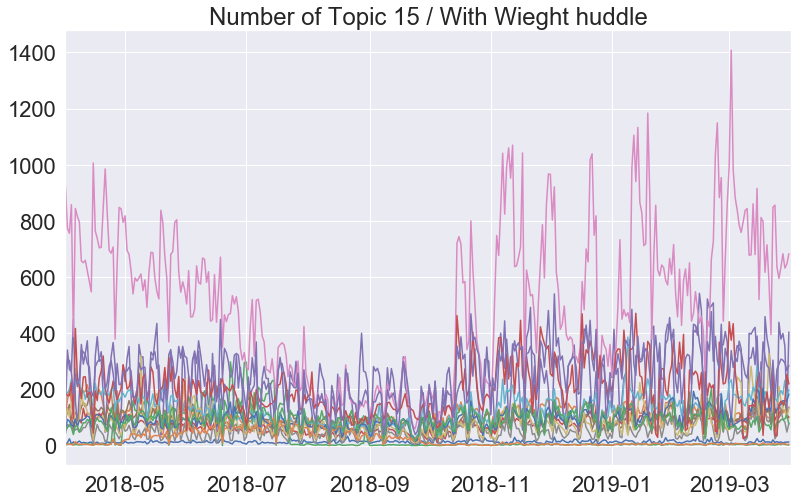

In [55]:
for i in range(15):
    plot_tp_2(i)

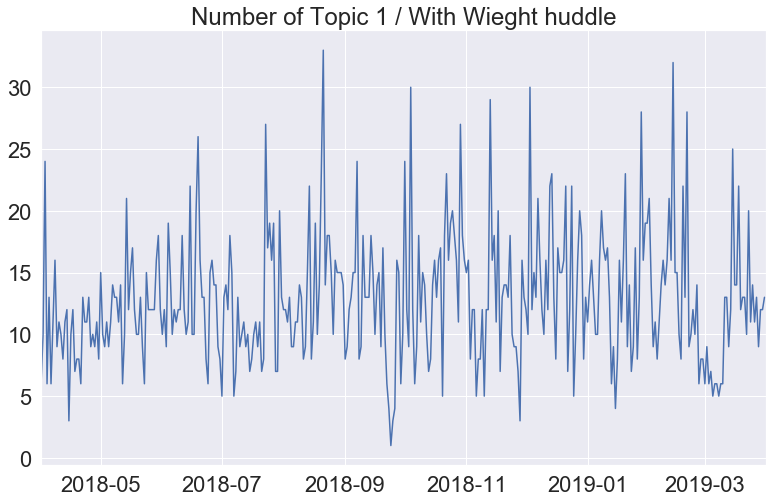

In [56]:
plot_tp_2(0)

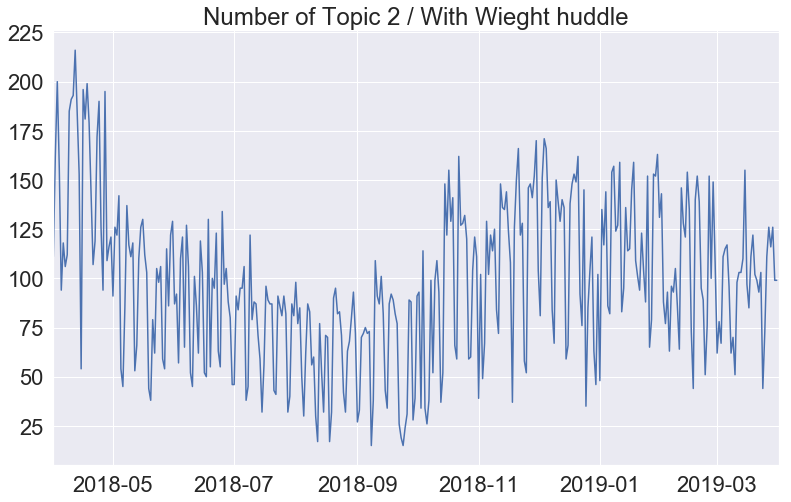

In [57]:
plot_tp_2(1)

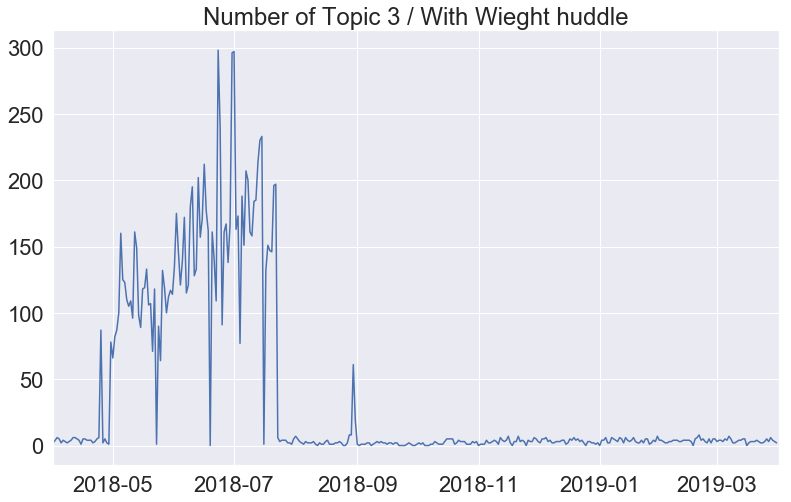

In [58]:
plot_tp_2(2)

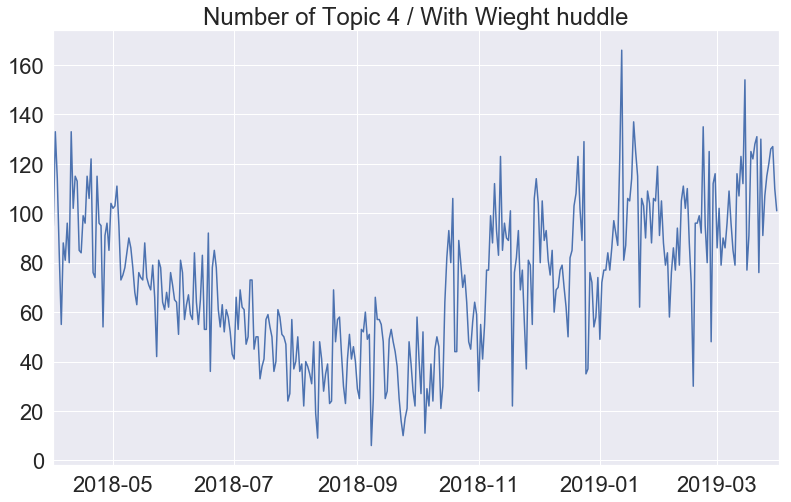

In [59]:
plot_tp_2(3)

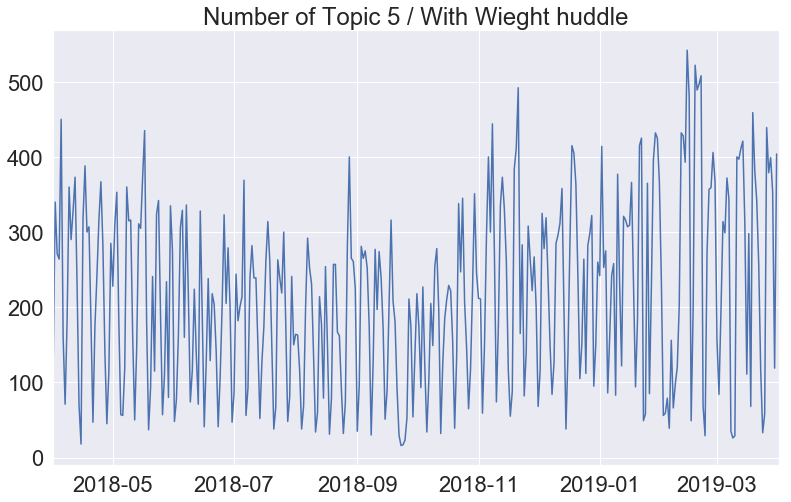

In [60]:
plot_tp_2(4)

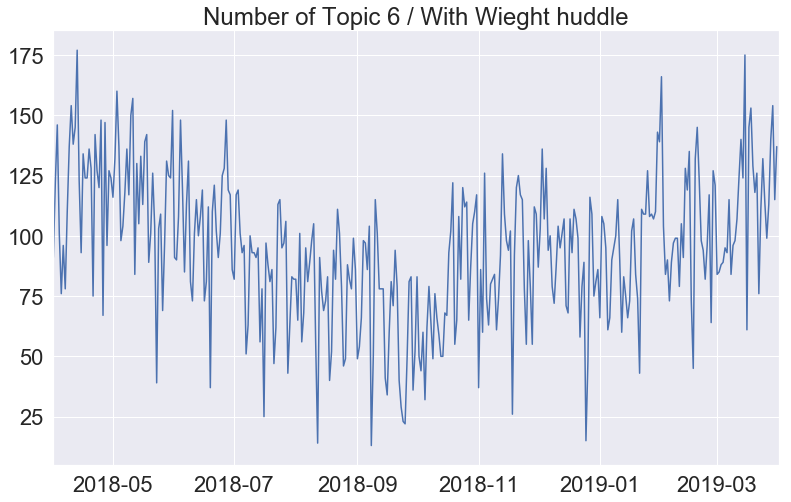

In [61]:
plot_tp_2(5)

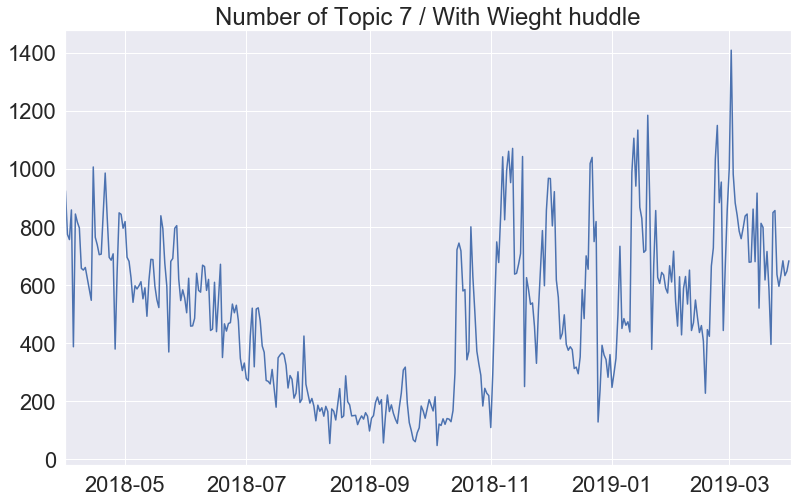

In [62]:
plot_tp_2(6)

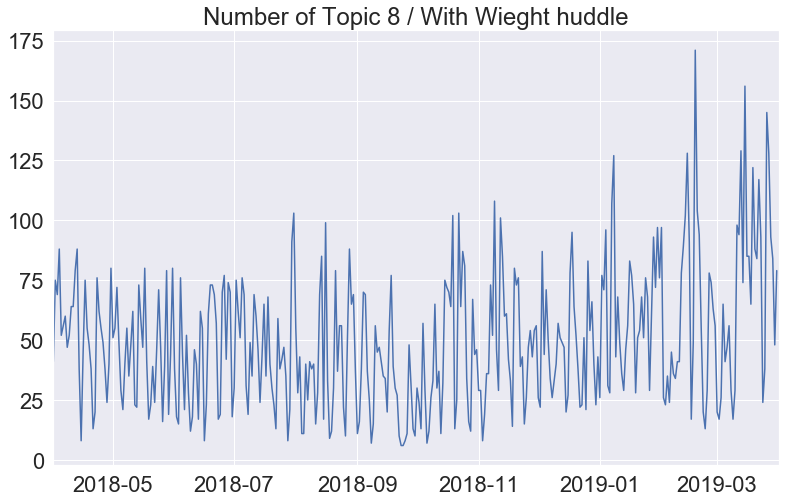

In [63]:
plot_tp_2(7)

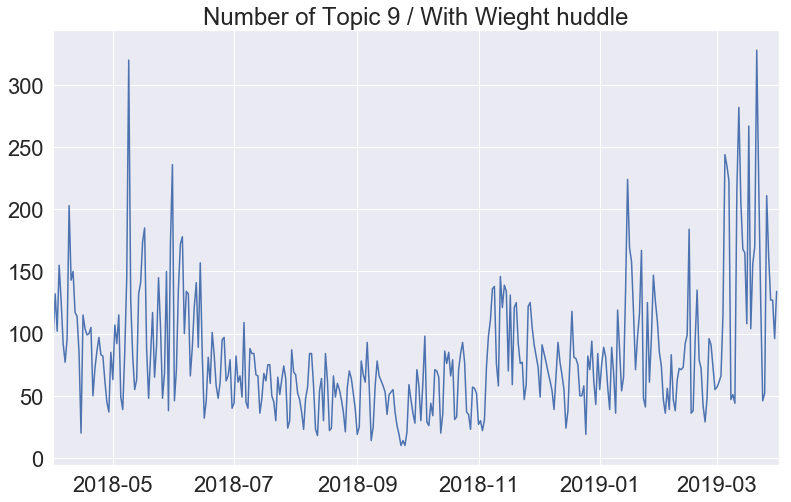

In [64]:
plot_tp_2(8)

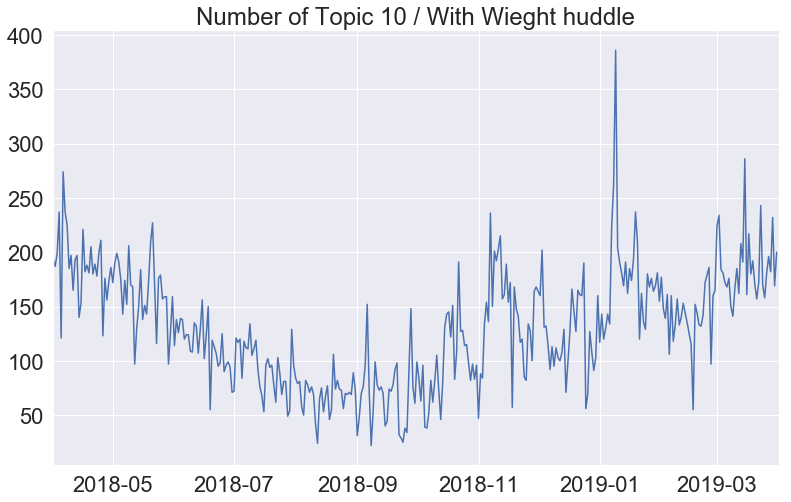

In [65]:
plot_tp_2(9)

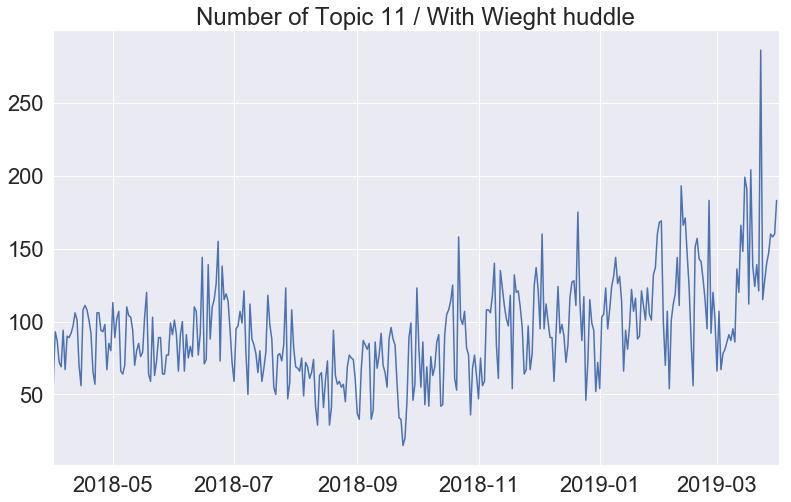

In [66]:
plot_tp_2(10)

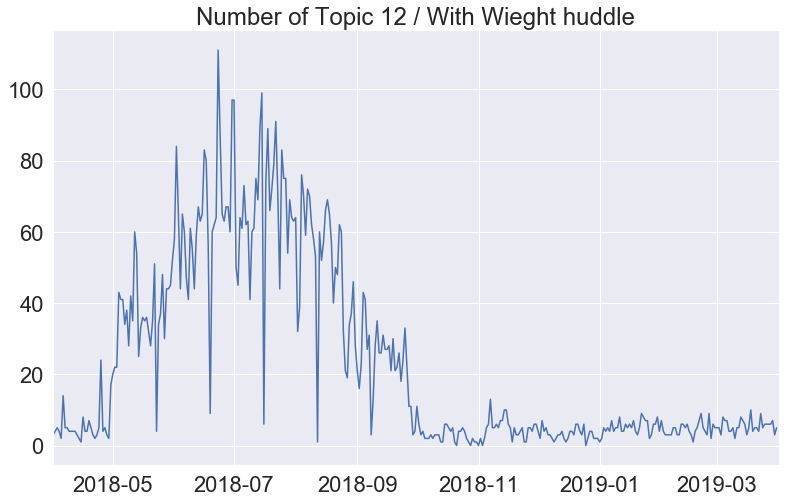

In [67]:
plot_tp_2(11)

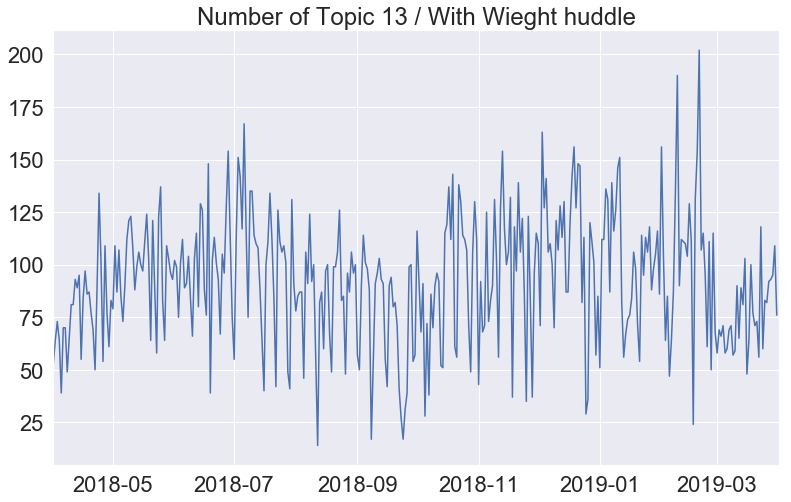

In [69]:
plot_tp_2(12)

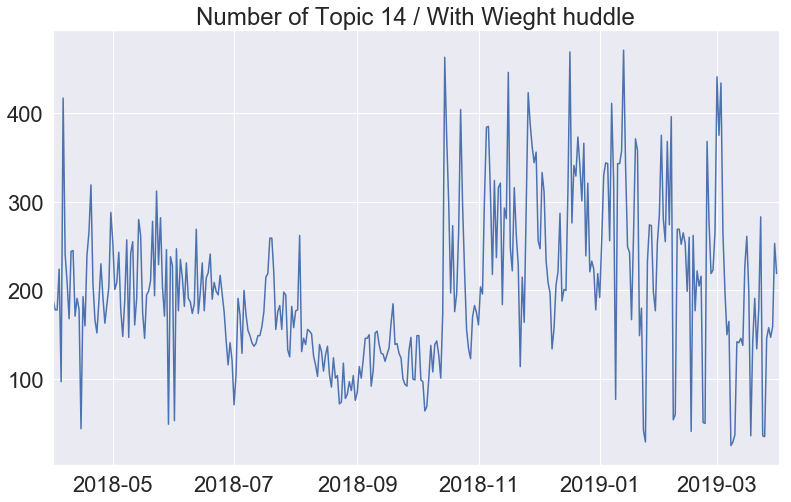

In [70]:
plot_tp_2(13)

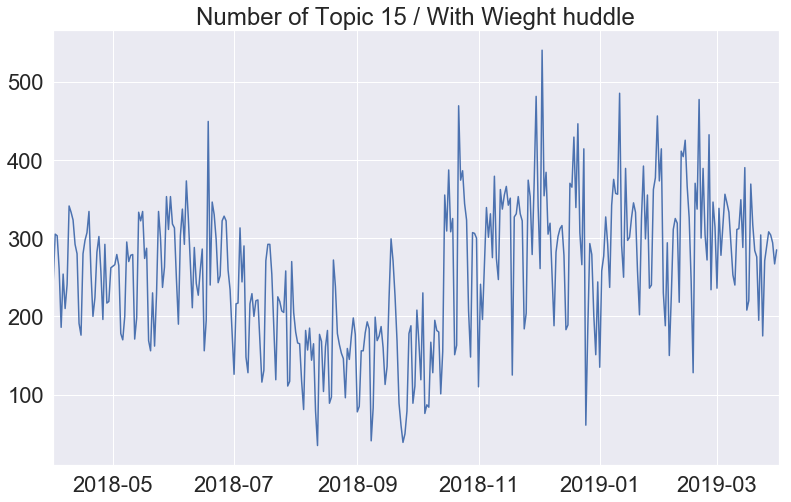

In [71]:
plot_tp_2(14)

In [72]:
with open('ordernumpy.pickle', 'wb') as handle:
    pickle.dump(ordernumpy, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [73]:
with open('temnp_1.pickle', 'wb') as handle:
    pickle.dump(temnp, handle, protocol=pickle.HIGHEST_PROTOCOL)